# ClusterExplorer: Explaining Black-Box Clustering Pipelines

This notebook shows a demo of Cluster-Explorer after the clustering pipeline. The dataset is available here: "https://archive.ics.uci.edu/dataset/186/wine+quality", and it is also provided in our "datasets" folder.
<br> This dataset describes wine quality based on physicochemical tests.


## Imports

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from src.cluster_explorer import Explainer

## Clustering pipeline

In [2]:
file_path = 'datasets/wine-qualityred.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter=',')
pd.set_option('display.max_colwidth', None)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop(columns='quality')

In [4]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
clusters =pd.Series(data=clusters)

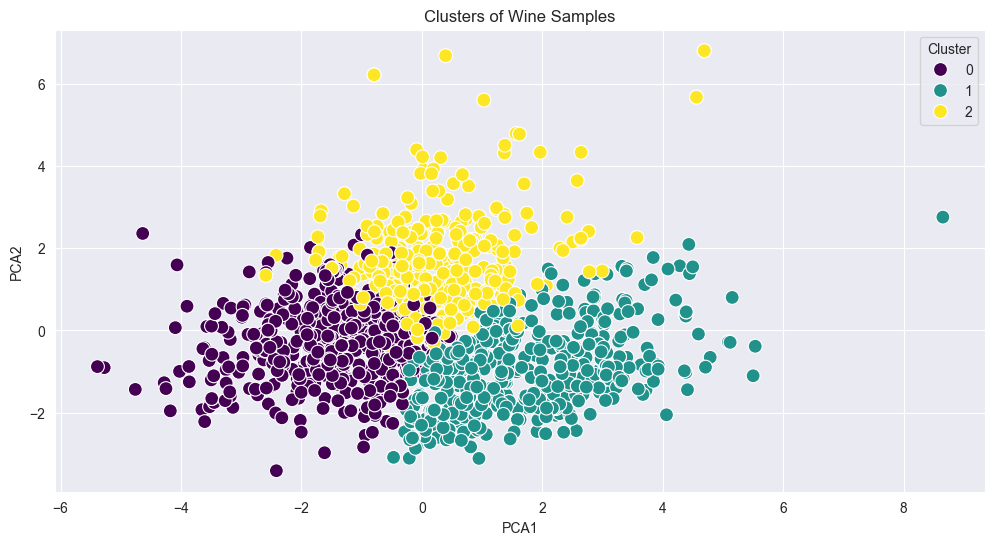

In [7]:
data = X.copy()
data['Cluster'] = clusters

# Evaluation and Visualization
# 1. PCA for 2D visualization
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# 2. Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Wine Samples')
plt.show()

## Clusters explanation

We just need to initialize the explainer with the original data and the clusters, and then call the generate_explanations function on the explainer object.

In [8]:
explainer = Explainer(X, clusters)
df_cluster_explore = explainer.generate_explanations(
    coverage_threshold=0.8,
    conciseness_threshold=0.2,
    separation_threshold=0.2,
    p_value=int((1 / 0.2))
)

### Cluster 0

In [9]:
df_cluster_explore[df_cluster_explore.Cluster == 0]

,rule,coverage,separation_err,conciseness,Cluster
0,"[[['citric acid', '>=', np.float64(0.0)], ['and'], ['citric acid', '<=', np.float64(0.26)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(76.75)]]]",0.83,0.13,0.50,0
1,"[[['citric acid', '>=', np.float64(0.0)], ['and'], ['citric acid', '<=', np.float64(0.26)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(62.6)]]]",0.80,0.09,0.50,0
2,"[[['citric acid', '>=', np.float64(0.0)], ['and'], ['citric acid', '<=', np.float64(0.25)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(76.75)]]]",0.82,0.12,0.50,0
3,"[[['citric acid', '>=', np.float64(0.0)], ['and'], ['citric acid', '<=', np.float64(0.3333333333333333)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(62.6)], ['and'], ['sulphates', '>=', np.float64(0.33)], ['and'], ['sulphates', '<=', np.float64(1.165)]]]",0.87,0.14,0.33,0
4,"[[['citric acid', '>=', np.float64(0.0)], ['and'], ['citric acid', '<=', np.float64(0.3333333333333333)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(62.6)]]]",0.87,0.15,0.50,0


### Cluster 1

In [10]:
df_cluster_explore[df_cluster_explore.Cluster == 1]

,rule,coverage,separation_err,conciseness,Cluster
10,"[[['citric acid', '>=', np.float64(0.26)], ['and'], ['citric acid', '<=', np.float64(1.0)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(76.75)], ['and'], ['fixed acidity', '>=', np.float64(7.9)], ['and'], ['fixed acidity', '<=', np.float64(15.9)]]]",0.88,0.16,0.33,1
9,"[[['citric acid', '>=', np.float64(0.26)], ['and'], ['citric acid', '<=', np.float64(1.0)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(76.75)], ['and'], ['fixed acidity', '>=', np.float64(7.450000047683716)], ['and'], ['fixed acidity', '<=', np.float64(15.9)]]]",0.91,0.20,0.33,1
8,"[[['citric acid', '>=', np.float64(0.26)], ['and'], ['citric acid', '<=', np.float64(1.0)], ['and'], ['fixed acidity', '>=', np.float64(7.9)], ['and'], ['fixed acidity', '<=', np.float64(15.9)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(53.166666666666664)]]]",0.80,0.08,0.33,1
12,"[[['citric acid', '>=', np.float64(0.26)], ['and'], ['citric acid', '<=', np.float64(1.0)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(62.6)], ['and'], ['fixed acidity', '>=', np.float64(7.450000047683716)], ['and'], ['fixed acidity', '<=', np.float64(15.9)]]]",0.87,0.15,0.33,1
13,"[[['citric acid', '>=', np.float64(0.33500000834465027)], ['and'], ['citric acid', '<=', np.float64(1.0)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(76.75)]]]",0.86,0.16,0.50,1
14,"[[['citric acid', '>=', np.float64(0.33500000834465027)], ['and'], ['citric acid', '<=', np.float64(1.0)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(62.6)]]]",0.81,0.12,0.50,1
11,"[[['citric acid', '>=', np.float64(0.26)], ['and'], ['citric acid', '<=', np.float64(1.0)], ['and'], ['total sulfur dioxide', '>=', np.float64(6.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(62.6)], ['and'], ['fixed acidity', '>=', np.float64(7.9)], ['and'], ['fixed acidity', '<=', np.float64(15.9)]]]",0.84,0.11,0.33,1


### Cluster 2

In [11]:
df_cluster_explore[df_cluster_explore.Cluster == 2]

,rule,coverage,separation_err,conciseness,Cluster
7,"[[['total sulfur dioxide', '>=', np.float64(57.5)], ['and'], ['total sulfur dioxide', '<=', np.float64(289.0)], ['and'], ['pH', '>=', np.float64(3.0749999284744263)], ['and'], ['pH', '<=', np.float64(3.4850000143051147)]]]",0.85,0.15,0.50,2
6,"[[['total sulfur dioxide', '>=', np.float64(52.0)], ['and'], ['total sulfur dioxide', '<=', np.float64(289.0)], ['and'], ['pH', '>=', np.float64(3.0749999284744263)], ['and'], ['pH', '<=', np.float64(3.4850000143051147)], ['and'], ['fixed acidity', '>=', np.float64(4.6)], ['and'], ['fixed acidity', '<=', np.float64(10.25)]]]",0.87,0.20,0.33,2
5,"[[['total sulfur dioxide', '>=', np.float64(57.5)], ['and'], ['total sulfur dioxide', '<=', np.float64(289.0)], ['and'], ['pH', '>=', np.float64(3.0749999284744263)], ['and'], ['pH', '<=', np.float64(3.4850000143051147)], ['and'], ['fixed acidity', '>=', np.float64(4.6)], ['and'], ['fixed acidity', '<=', np.float64(10.25)]]]",0.82,0.12,0.33,2
